In [5]:
import numpy as np
from video_import import *
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from skimage.filters.thresholding import threshold_otsu
from skimage.segmentation import mark_boundaries
from skimage.exposure import adjust_log
import cv2 
import pandas as pd

ModuleNotFoundError: No module named 'imageio.v2'

: 

# 1. Import data

In [2]:
data = import_avi("/Users/juanliyau/Downloads/video_1.avi")
coordinates_file = pd.ExcelFile("xy coordinates for knee imaging 0913.xlsx")

NameError: name 'import_avi' is not defined

In [4]:
sheet_name = "8.29 3rd"
coordinates = pd.read_excel(coordinates_file, sheet_name)
coordinates = coordinates[['Frame Number','Points','X','Y']]
frames_to_analyze = np.unique(coordinates["Frame Number"])
frames_to_analyze = frames_to_analyze[~np.isnan(frames_to_analyze)]
frames_to_analyze = frames_to_analyze.astype(int)

In [5]:
coordinates["Frame Number"] = np.repeat(frames_to_analyze,4)

# Visualization

In [1]:
frame_preview = 634
frame = data[:,:,:,frame_preview]
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,8))
plt.title(f"Frame {frame_preview}")
plt.imshow(frame)
plt.show()

NameError: name 'data' is not defined

# Preprocessing

### Gaussian Blur
##### Gets rid of noise and smoothes out edges

In [7]:
sigma = 3
frame_smooth = ndi.gaussian_filter(frame, sigma)

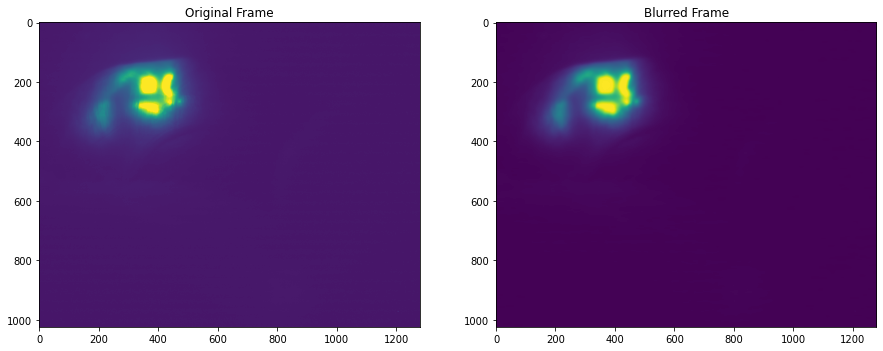

In [8]:
fig,ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(frame)
ax[0].set_title("Original Frame")
ax[1].imshow(frame_smooth)
ax[1].set_title("Blurred Frame")
plt.show()

In [9]:
contrasted_image_log = adjust_log(frame_smooth, 1)

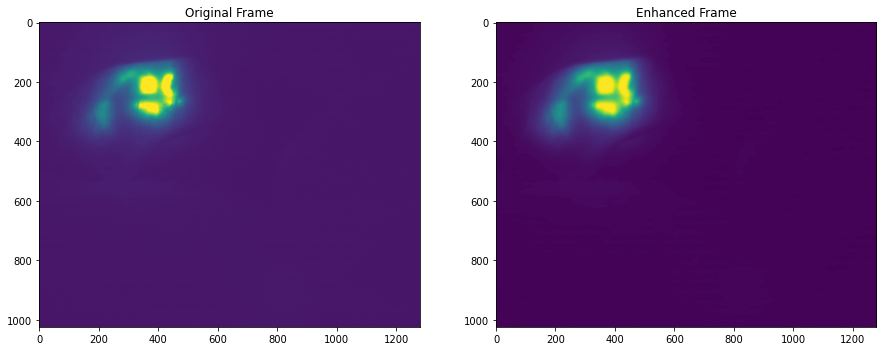

In [10]:
fig,ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(frame)
ax[0].set_title("Original Frame")
ax[1].imshow(contrasted_image_log)
ax[1].set_title("Enhanced Frame")
plt.show()

# Segmentation

##### Thresholding

In [11]:
threshold_value_otsu = threshold_otsu(contrasted_image_log)
binary_image_otsu = contrasted_image_log > threshold_value_otsu
binary_image_otsu = binary_image_otsu.astype(int)

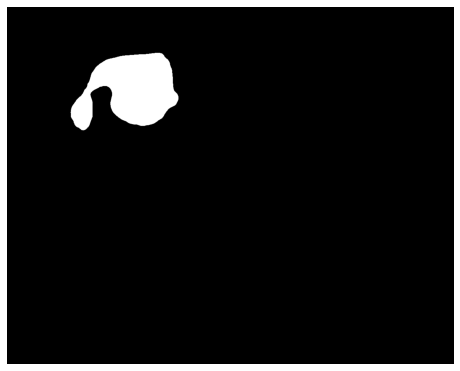

In [12]:
fig = plt.figure(figsize=(8,8))
plt.imshow(binary_image_otsu, cmap="gray")
plt.axis("off")
plt.show()

##### Boundary Detection

In [13]:
m = mark_boundaries(frame, binary_image_otsu)

In [14]:
frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)

In [15]:
show_frame = np.copy(frame)
show_frame[np.all(m==[1,1,0], axis=2)] = [255,255,0]

(-0.5, 1279.5, 1023.5, -0.5)

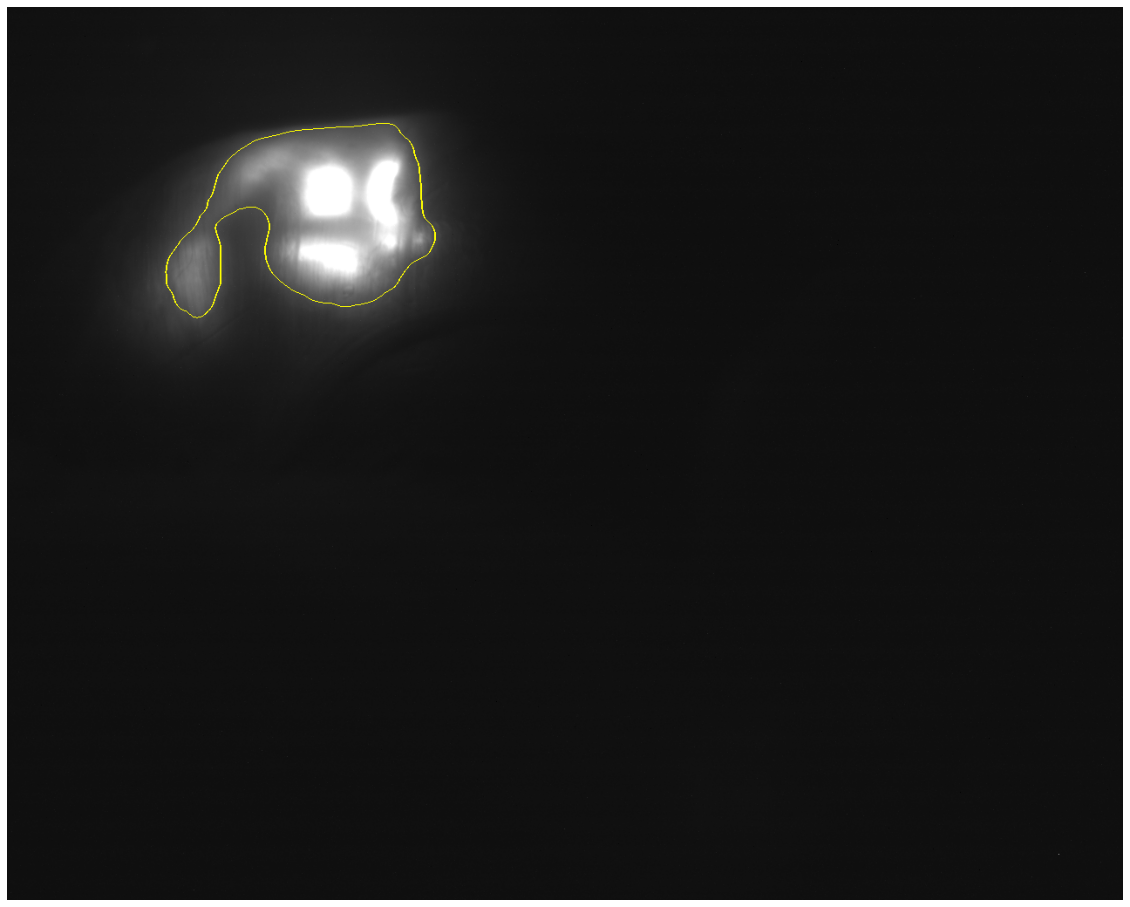

In [16]:
fig = plt.figure(figsize=(20,20))
plt.imshow(show_frame, cmap="gray")
plt.axis("off")

In [17]:
# Make boudnaries bigger
show_frame_scaled = np.copy(show_frame)
scaling = 3
boundaries = np.where(np.all(show_frame_scaled==[255,255,0], axis=2))
for i in range(len(boundaries[0])):
    x = boundaries[0][i]
    y = boundaries[1][i]

    for j in range(1,scaling+1):
        # top
        show_frame_scaled[x,y+1*j,:] = [255,255,0]
        # bottom
        show_frame_scaled[x,y-1*j,:] = [255,255,0]
        # right
        show_frame_scaled[x+1*j,y,:] = [255,255,0]
        # left
        show_frame_scaled[x-1*j,y,:] = [255,255,0]
        # top_right
        show_frame_scaled[x+1*j,y+1*j,:] = [255,255,0]
        # top_left
        show_frame_scaled[x-1*j,y+1*j,:] = [255,255,0]
        # bottom_right
        show_frame_scaled[x+1*j,y-1*j,:] = [255,255,0]
        # bottom_left
        show_frame_scaled[x-1*j,y-1*j,:] = [255,255,0]

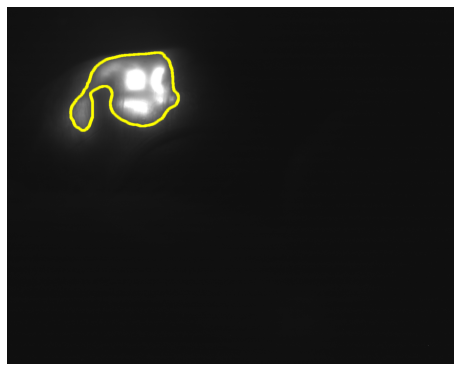

In [18]:
fig = plt.figure(figsize=(8,8))
plt.imshow(show_frame_scaled, cmap="gray")
plt.axis("off")
plt.show()